<a href="https://colab.research.google.com/github/penguin-ke/algorithm/blob/master/12.23%20NP%E5%95%8F%E9%A1%8C%E4%BB%8B%E7%B4%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**子集合加總問題(subset sum problem)**

問題敘述：
對於某個給定的值M,如何在集合S裡找到子集合s,使子集合加總後為M

例子：M=7,S={1,3,4,5} ---->s={3,4}


**NP-complete**

證明:

So we have shown a reduction from 3SAT
to SUBSET SUM, and so SUBSET SUM is NP-complete.[1]

解法(動態規劃法): [2]

subset(i,j) --->表示S集合中前i個元素的子集和等於j

若S[i] > j --->S[i]不在子集s中

若S[i] <= j --->有以下兩種情況： 

1.   一種情況是S[i]**不在子集s中**，則subset(i, j) = subset(i-1, j)
2.   一種情況是S[i]**在子集s中**，則subset(i, j)= subset(i-1, j-S[i])

確認初始值↓

對於i=0,1,2,...,n, 有subset(i, 0)=True (紅框部分)

對於j=1,2,...,M, 有subset(0, j)=False  (藍框部分)

利用動態規劃法，就能得到(n+1)*(M+1)的真值表了，而答案就是subset(n, M)




In [ ]:
import numpy as np
 
# A Dynamic Programming solution for subset sum problem
# Returns true if there is a subset of set with sum equal to given sum
 
def isSubsetSum(S, n, M):
    # The value of subset[i, j] will be
    # true if there is a subset of
    # set[0..j-1] with sum equal to i
    subset = np.array([[True]*(M+1)]*(n+1))
    
    
    # If sum is 0, then answer is true (設定初值--->紅框)
    for i in range(0, n+1):
        subset[i, 0] = True
        
        
    # If sum is not 0 and set is empty, (設定初值--->藍框)
    # then answer is false
    for i in range(1, M+1):
        subset[0, i] = False
        
 
    # Fill the subset table in bottom-up manner (*註1)
    for i in range(1, n+1):
        for j in range(1, M+1):
            if j < S[i-1]:
                subset[i, j] = subset[i-1, j]  
            else:
                subset[i, j] = subset[i-1, j] or subset[i-1, j-S[i-1]]
 
    # print the True-False table(印出最終的真值表)
    for i in range(0, n+1):
        for j in range(0, M+1):
           print("%-6s"%subset[i][j], end="  ")
        print(" ")
 
    if subset[n, M]: #如果綠框為True,為有解
        print("Found a subset with given sum")
        sol = []
        # using backtracing to find the solution (回溯法找解)
        i = n
        while i >= 0:
            if subset[i, M] and not subset[i-1, M]:
                sol.append(S[i-1])
                M -= st[i-1]
            if M == 0:
                break
            i -= 1
        print("The solution is %s." % sol)
    else:
        print("No subset with given sum")
 
# test
st = [1, 3, 4, 5]
n = len(st)
sm = 7
isSubsetSum(st, n, sm)

True    False   False   False   False   False   False   False    
True    True    False   False   False   False   False   False    
True    True    False   True    True    False   False   False    
True    True    False   True    True    True    False   True     
True    True    False   True    True    True    True    True     
Found a subset with given sum
The solution is [4, 3].


解法(真假值表格解釋)[3]


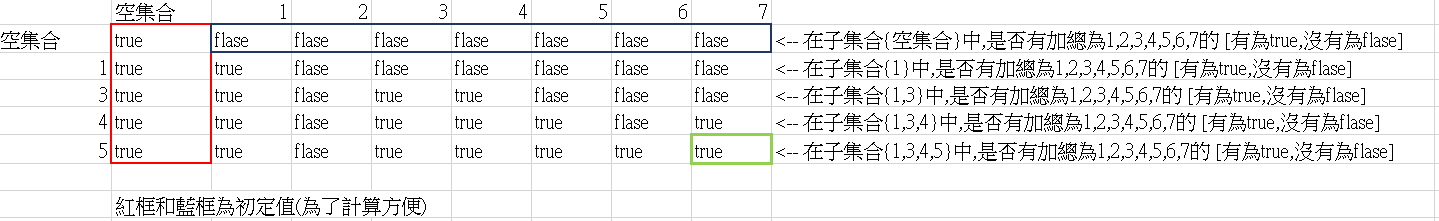

**自寫程式**

In [47]:
st = [1, 3, 4, 5]
n = len(st)
sm = 7

print("數字為2個")
for i in range(n):
  for j in range(i+1,n):
    x=st[i]
    y=st[j]
    z=x+y
    print("x=%d "%x+"y=%d ---> "%y+"z=%d+%d=%d"%(x,y,z))
    if z==sm:
      print("↑")
      print("子集合有可以加總為%d的組合"%sm)

print("")
print("數字為3個")
for i in range(n):
  for j in range(i+1,n-1):
    for k in range(j+1,n):
      x=st[i]
      y=st[j]
      o=st[k]
      z=x+y+o
      print("x=%d "%x+"y=%d "%y+"o=%d "%o+"z=%d+%d+%d=%d"%(x,y,o,z))
      if z==sm:
       print("↑")
       print("子集合有可以加總為%d的組合"%sm)

print("")
print("數字為4個")
z=0
for s in st:
  z=z+s
print(z)
if z==sm:
 print("↑")
 print("子集合有可以加總為%d的組合"%sm)


數字為2個
x=1 y=3 ---> z=1+3=4
x=1 y=4 ---> z=1+4=5
x=1 y=5 ---> z=1+5=6
x=3 y=4 ---> z=3+4=7
↑
子集合有可以加總為7的組合
x=3 y=5 ---> z=3+5=8
x=4 y=5 ---> z=4+5=9

數字為3個
x=1 y=3 o=4 z=1+3+4=8
x=1 y=3 o=5 z=1+3+5=9
x=1 y=4 o=5 z=1+4+5=10
x=3 y=4 o=5 z=3+4+5=12

數字為4個
13


**reference list**

[1] Proving NP-Completeness

available:https://people.cs.clemson.edu/~goddard/texts/theoryOfComputation/19b.pdf

[2] 動態規劃法（三）子集和問題(Subset sum problem)

available:https://www.itread01.com/content/1528097890.html

[3] Subset Sum Problem - Dynamic Problem 動態規劃

available:https://www.bilibili.com/video/BV1NK411J7dV?t=236